In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
google_stock_data = pd.read_csv('GOOG.csv')
google_stock_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [5]:
google_stock_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [6]:
google_stock_data = google_stock_data[['date','open','close']] # Extracting required columns
google_stock_data['date'] = pd.to_datetime(google_stock_data['date'].apply(lambda x: x.split()[0])) # Selecting only date
google_stock_data.set_index('date',drop=True,inplace=True) # Setting date column as index
google_stock_data.head()

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


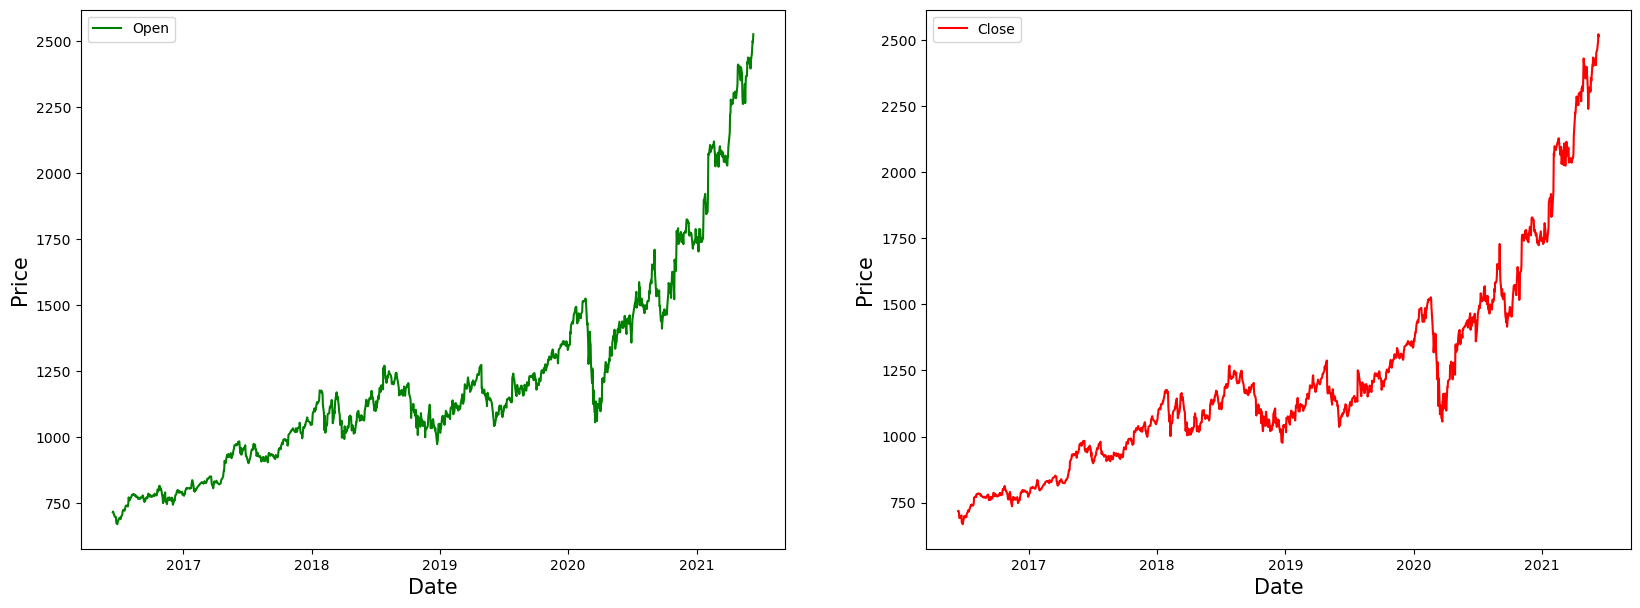

In [7]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(google_stock_data['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(google_stock_data['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

In [8]:
#Data Pre-Processing
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
google_stock_data[google_stock_data.columns] = MMS.fit_transform(google_stock_data)

In [9]:
google_stock_data.shape

(1258, 2)

In [10]:
training_size = round(len(google_stock_data) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1006

In [11]:
train_data = google_stock_data[:training_size]
test_data  = google_stock_data[training_size:]

train_data.shape, test_data.shape

((1006, 2), (252, 2))

In [12]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [13]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [14]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((956, 50, 2), (956, 2), (202, 50, 2), (202, 2))

In [26]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [27]:
#Creating LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [28]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
30/30 [==============================] - 9s 73ms/step - loss: 0.0083 - mean_absolute_error: 0.0644 - val_loss: 0.0128 - val_mean_absolute_error: 0.0944
Epoch 2/80
30/30 [==============================] - 1s 37ms/step - loss: 9.7852e-04 - mean_absolute_error: 0.0245 - val_loss: 0.0074 - val_mean_absolute_error: 0.0715
Epoch 3/80
30/30 [==============================] - 1s 39ms/step - loss: 5.7870e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0022 - val_mean_absolute_error: 0.0374
Epoch 4/80
30/30 [==============================] - 1s 40ms/step - loss: 5.5872e-04 - mean_absolute_error: 0.0169 - val_loss: 0.0031 - val_mean_absolute_error: 0.0441
Epoch 5/80
30/30 [==============================] - 1s 46ms/step - loss: 4.9128e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0030 - val_mean_absolute_error: 0.0434
Epoch 6/80
30/30 [==============================] - 1s 37ms/step - loss: 5.5059e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0056 - val_mean_absolute_error: 0.0629
Ep

In [30]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

7/7 [==============================] - 1s 12ms/step


array([[0.47635564, 0.4813159 ],
       [0.48326987, 0.48777008],
       [0.48817775, 0.49213916],
       [0.5031489 , 0.50844014],
       [0.5134634 , 0.5184293 ]], dtype=float32)

In [31]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[1554.1252, 1560.3021],
       [1566.9437, 1572.2638],
       [1576.0425, 1580.3612],
       [1603.7979, 1610.5725],
       [1622.92  , 1629.0858]], dtype=float32)

In [36]:
#Visualizing predicted and actual data
#Merging actual and predicted data for better visualization
gs_slic_data = pd.concat([google_stock_data.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=google_stock_data.iloc[-202:].index)], axis=1)

In [37]:
gs_slic_data[['open','close']] =MMS.inverse_transform(gs_slic_data[['open','close']])#inverse scaling

In [38]:
gs_slic_data.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-08-24,1593.98,1588.20,1554.125244,1560.302124
2020-08-25,1582.07,1608.22,1566.943726,1572.263794
2020-08-26,1608.00,1652.38,1576.042480,1580.361206
2020-08-27,1653.68,1634.33,1603.797852,1610.572510
2020-08-28,1633.49,1644.41,1622.920044,1629.085815


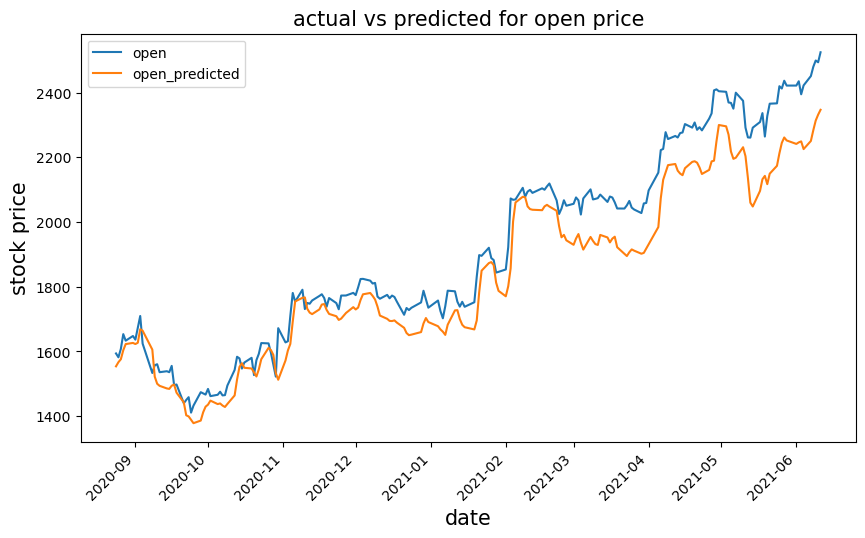

In [40]:
gs_slic_data[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('date',size=15)
plt.ylabel('stock price',size=15)
plt.title('actual vs predicted for open price',size=15)
plt.show()

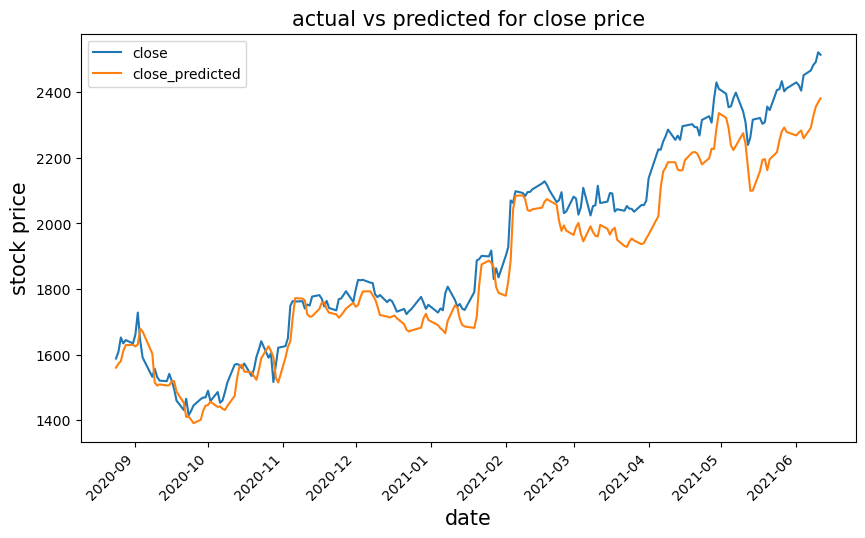

In [41]:
gs_slic_data[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('date',size=15)
plt.ylabel('stock price',size=15)
plt.title('actual vs predicted for close price',size=15)
plt.show()

In [43]:
#Predicting upcoming 10 days
# Creating a dataframe and adding 10 days to existing index  
gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1],periods=11, freq='D', closed='right')))

In [44]:
gs_slic_data['2021-06-09       ':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.50,2491.40,2313.808105,2354.686035
2021-06-10,2494.01,2521.60,2331.951904,2368.884277
2021-06-11,2524.92,2513.93,2347.097168,2381.058350
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [45]:
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=gs_slic_data.index)
upcoming_prediction.index= pd.to_datetime(upcoming_prediction.index)

In [47]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
    up_pred = model.predict(curr_seq)
    upcoming_prediction.iloc[i]=up_pred
    curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
    curr_seq =curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 47ms/step


In [48]:
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

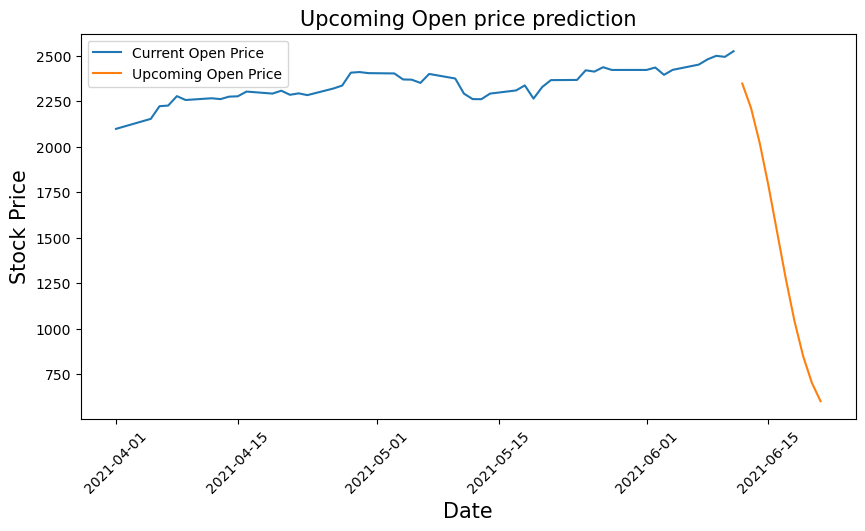

In [49]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

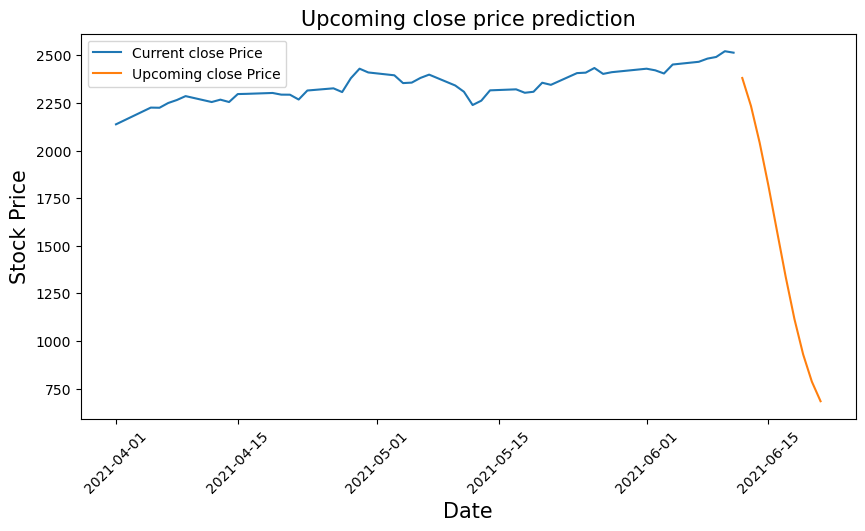

In [50]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()